In [1]:
from pytesseract import Output

import matplotlib.pyplot as plt
import pytesseract
import cv2
import numpy as np
import csv

## Bruteforce optimization to find closest point of a shape from a word.

In [2]:
i = 0
currClosestRatio = None
currClosestValue = None
currClosestShape = None

with open('../data/docs_data_mapping_clean.csv', "w", newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    
    with open('../data/docs_data_words_clean.csv', 'r') as file:
        readerWord = csv.reader(file)
        for rowWord in readerWord:
            currClosestRatio = (100000, 100000)
            print('===================================')
            print(rowWord[0], rowWord[1])
            xWord, yWord = rowWord[1].strip('()').split(',')
            print(xWord, yWord)
            with open('../data/docs_data_shapes_clean.csv', 'r') as file:
                readerShape = csv.reader(file)
                for rowShape in readerShape:
                    if (rowShape[0].find('Picture') == -1):
                        print(rowShape[0])
                        for pointShape in rowShape:
                            if i == 0:
                                i = 1
                                continue
                            coord = pointShape.strip('[]')
                            xShape, yShape = coord.split()
                            print(xShape, yShape)
                            print(xWord, yWord)
                            xLeft, yLeft = int(xWord) - int(xShape), int(yWord) - int(yShape)
                            #xRight, yRight = int(xShape) - int(xWord), int(yShape) - int(yWord)
                            #if (xLeft < 0 or yLeft < 0):
                                #print('ratio: ', (xLeft, yLeft))
                            #else:
                                #print('ratio: ', (xRight, yRight))

                            xLeft = abs(xLeft)
                            yLeft = abs(yLeft)
                            print('ratio: ', (xLeft, yLeft))
                            #print('currClosestValue: ', currClosestRatio[0] ,currClosestRatio[1])
                            if (xLeft + yLeft < currClosestRatio[0] + currClosestRatio[1]):
                                currClosestRatio = (xLeft, yLeft)
                                currClosestCoord = (xShape, yShape)
                                currClosestShape = rowShape[0]
                                print('currClosestValue: ',currClosestShape, currClosestCoord)
                        i = 0
            print('Final currClosestValue: ', currClosestShape, currClosestCoord)
            writer.writerow([rowWord[0], currClosestShape])
            print('===================================')

Header (598, 54)
598  54
[['Box2' (348, 522)]]
10 490
598  54
ratio:  (588, 436)
currClosestValue:  [['Box2' (348, 522)]] ('10', '490')
10 555
598  54
ratio:  (588, 501)
686 555
598  54
ratio:  (88, 501)
currClosestValue:  [['Box2' (348, 522)]] ('686', '555')
686 490
598  54
ratio:  (88, 436)
currClosestValue:  [['Box2' (348, 522)]] ('686', '490')
[['Box4' (348, 409)]]
12 343
598  54
ratio:  (586, 289)
12 476
598  54
ratio:  (586, 422)
684 476
598  54
ratio:  (86, 422)
currClosestValue:  [['Box4' (348, 409)]] ('684', '476')
684 343
598  54
ratio:  (86, 289)
currClosestValue:  [['Box4' (348, 409)]] ('684', '343')
[['Box6' (422, 206)]]
162 95
598  54
ratio:  (436, 41)
162 318
598  54
ratio:  (436, 264)
683 318
598  54
ratio:  (85, 264)
currClosestValue:  [['Box6' (422, 206)]] ('683', '318')
683 95
598  54
ratio:  (85, 41)
currClosestValue:  [['Box6' (422, 206)]] ('683', '95')
[['Box8' (587, 238)]]
535 218
598  54
ratio:  (63, 164)
535 258
598  54
ratio:  (63, 204)
639 258
598  54
ratio: 

Header [['Box22' (348, 45)]]
["'Box22'", '(348,', '45)']
348 45
List [['Box20' (82, 207)]]
["'Box20'", '(82,', '207)']
82 207
Div [['Box6' (422, 206)]]
["'Box6'", '(422,', '206)']
422 206
Button [['Box8' (587, 238)]]
["'Box8'", '(587,', '238)']
587 238
Div [['Box4' (348, 409)]]
["'Box4'", '(348,', '409)']
348 409
Footer [['Box2' (348, 522)]]
["'Box2'", '(348,', '522)']
348 522


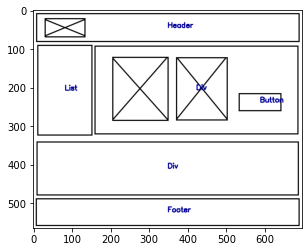

In [3]:
img = cv2.imread('../wireframes/3.png')


with open('../data/docs_data_mapping_clean.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row[0], row[1])
        values = row[1].strip('[]').split()
        print(values)
        x, y = int(values[1].strip('(,')), int(values[2].strip(')'))
        print(x, y)
        cv2.putText(img, row[0], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (150, 0, 0), 2)
        
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig('../results/docs_mapping.png', dpi=200)
plt.show()